In [2]:
from nltk.probability import FreqDist
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
import json
import _pickle as cPickle

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicemartin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
!source activate rl-nlp

In [13]:
split = "train"

### Validation set

In [14]:
with open('../../data/vqa-v2/v2_OpenEnded_mscoco_{}2014_questions.json'.format(split)) as json_file:
    data = json.load(json_file)

In [15]:
df=pd.read_json(json.dumps(data["questions"]))

In [16]:
len(df)

443757

In [17]:
df.head()

image_id                                     question  question_id
0    458752    What is this photo taken looking through?    458752000
1    458752           What position is this man playing?    458752001
2    458752             What color is the players shirt?    458752002
3    458752  Is this man a professional baseball player?    458752003
4    262146                      What color is the snow?    262146000

### Stats on the Questions Dataset.

In [18]:
token=word_tokenize(" ".join(df.question))

In [70]:
fdist = FreqDist(token)

In [71]:
fdist

FreqDist({'?': 443931, 'the': 322348, 'What': 183878, 'is': 163718, 'Is': 113213, 'this': 87653, 'are': 70942, 'in': 68451, 'on': 62923, 'of': 58767, ...})

In [72]:
fdist1 = fdist.most_common(30)
#fdist1

In [73]:
fdist1_dict={ key:value for key,value in fdist1}

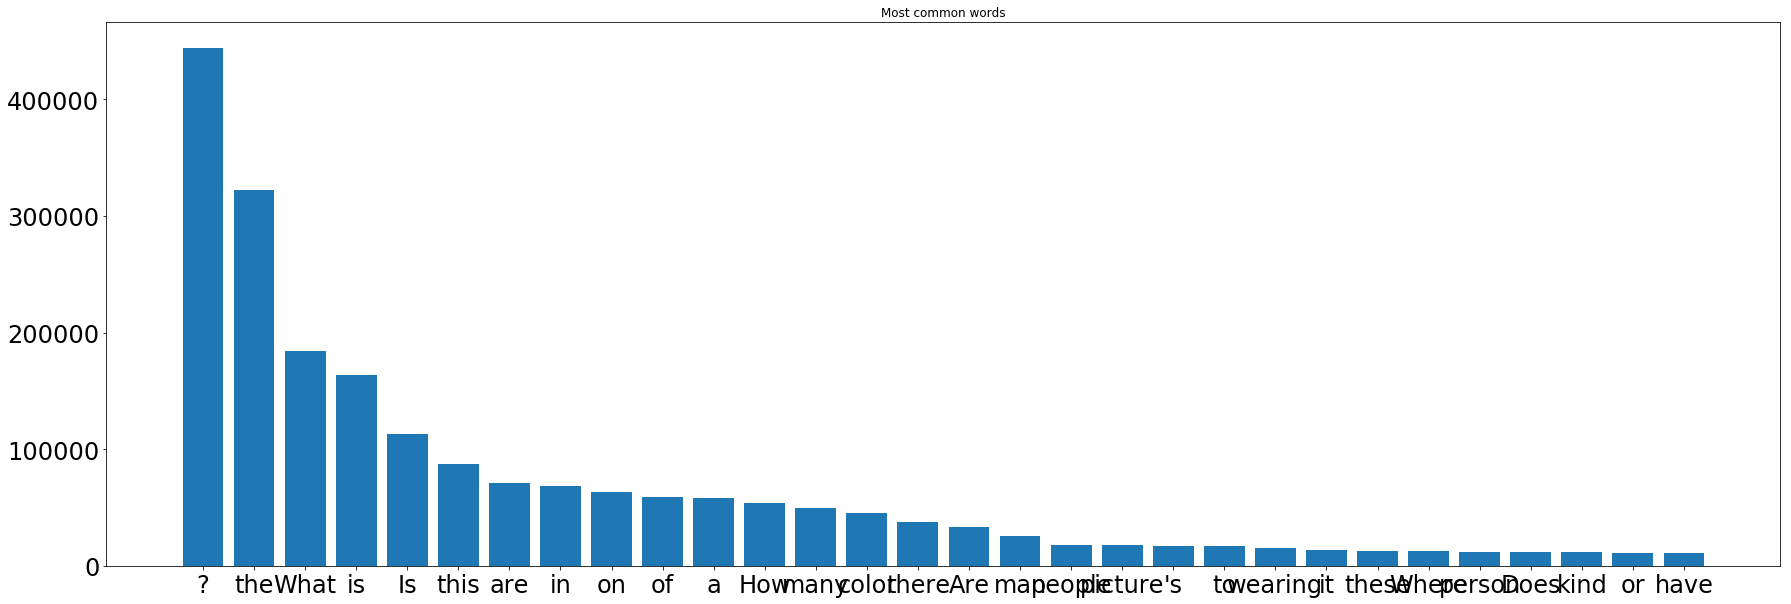

In [74]:
plt.figure(figsize=(30,10))
plt.title("Most common words")
plt.bar(fdist1_dict.keys(), fdist1_dict.values())
plt.tick_params(labelsize=24)
plt.savefig("vqa_{}_dataset_most_common_words.png".format(split))

In [75]:
len_func=lambda t : len(word_tokenize(t))

In [76]:
len_questions=df.question.apply(len_func)

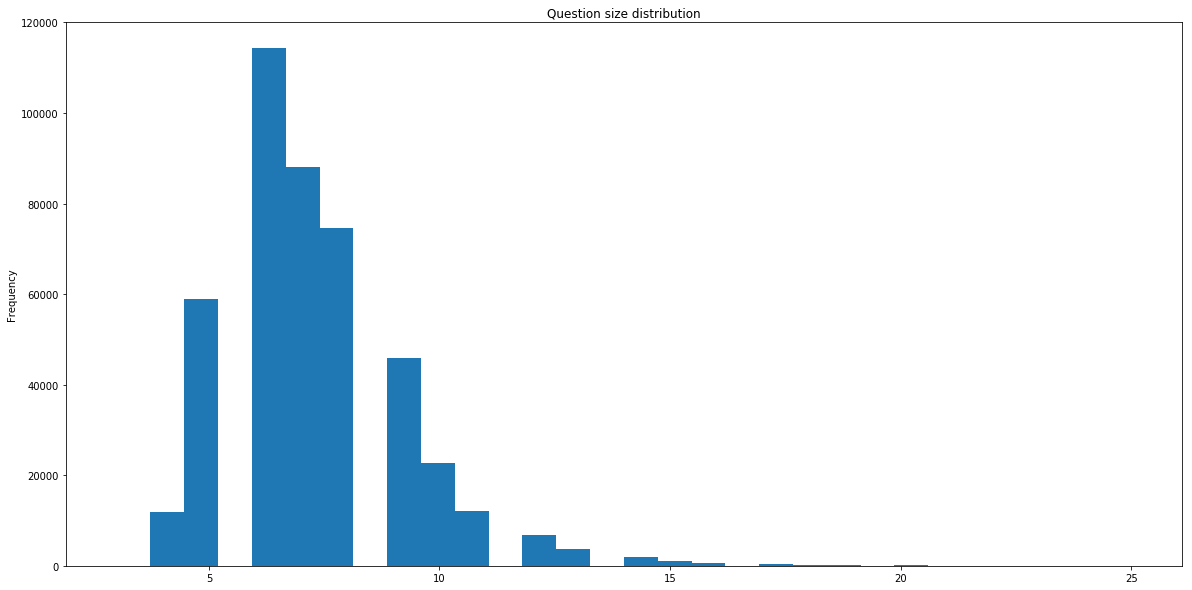

In [77]:
plt.figure(figsize=(20,10))
plt.title("Question size distribution")
len_questions.plot.hist(bins=30)
plt.savefig("vqa_{}_dataset_question_size_distribution.png".format(split))

In [78]:
import numpy as np
np.mean(len_questions)

7.24905522617108

### Stats on the answers

In [79]:
import _pickle as cPickle

In [80]:
answer_path = "../../data/vqa-v2/cache/{}_target.pkl".format(split)
answers = cPickle.load(open(answer_path, "rb"))
answers = sorted(answers, key=lambda x: x["question_id"])

In [81]:
answers[0]

{'image_id': 9, 'labels': [841], 'scores': [1], 'question_id': 9000}

In [82]:
def get_num_answers(answers):
    num_answers = []
    for ans in answers:
        num_ans = len(ans["labels"])
        num_answers.append(num_ans)
    return num_answers

In [83]:
num_answers = get_num_answers(answers)
NUM_ANS = pd.Series(num_answers)

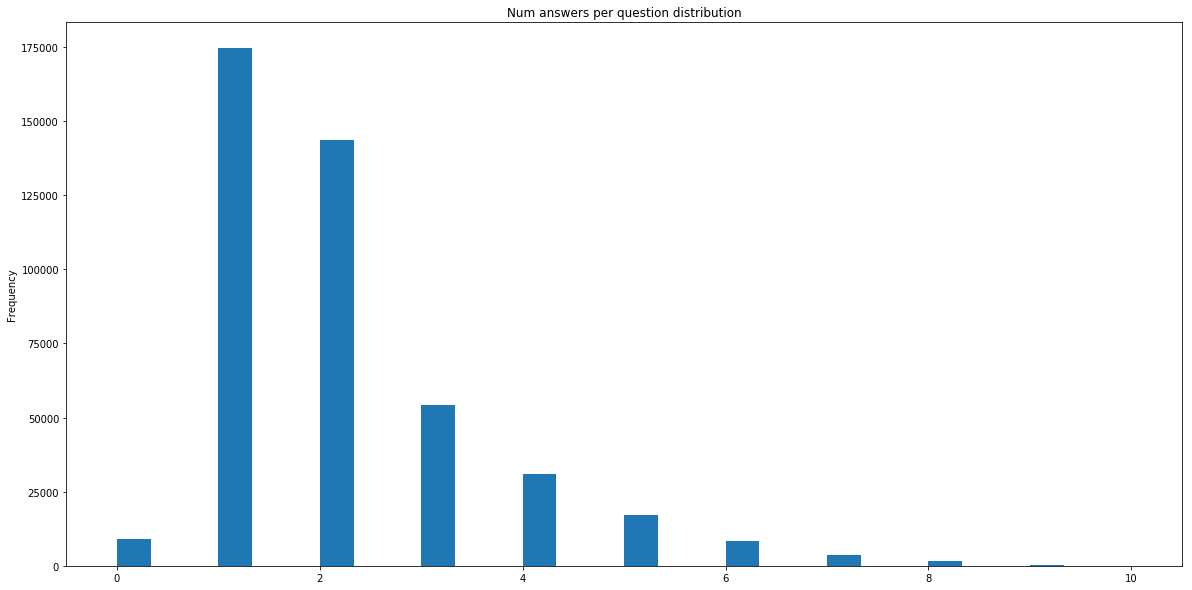

In [84]:
plt.figure(figsize=(20,10))
plt.title("Num answers per question distribution")
NUM_ANS.plot.hist(bins=30)
plt.savefig('vqa_{}_dataset_num_answers_distrib.png'.format(split))

In [85]:
import os
label2ans_path = os.path.join("../../data/vqa-v2", "cache", "trainval_label2ans.pkl")
label2ans = cPickle.load(open(label2ans_path, "rb"))
ans2label_path = os.path.join("../../data/vqa-v2", "cache", "trainval_ans2label.pkl")
ans2label = cPickle.load(open(ans2label_path, "rb"))

In [86]:
label2ans = {v:k for k,v in ans2label.items()}

In [87]:
def get_word_answers(answers, label2ans):
    word_answers = []
    for ans in answers:
        if len(ans['labels']) > 0:
            for l in ans['labels']:
                word_answers.append(label2ans[l])
    return word_answers

In [88]:
word_answers = get_word_answers(answers, label2ans)

In [89]:
word_answers[:5]

['2', 'pink and yellow', 'broccoli', 'tree', 'trees']

In [90]:
ans_token=word_tokenize(" ".join(pd.Series(word_answers)))

In [91]:
fdist_ans = FreqDist(ans_token)

In [92]:
fdist_ans

FreqDist({'yes': 124749, 'no': 123189, 'white': 24429, '2': 22291, '1': 20680, 'and': 16746, 'black': 15479, '3': 14559, 'blue': 13096, 'red': 12906, ...})

In [93]:
fdist_ans20 = fdist_ans.most_common(20)
fdistans_dict={ key:value for key,value in fdist_ans20}

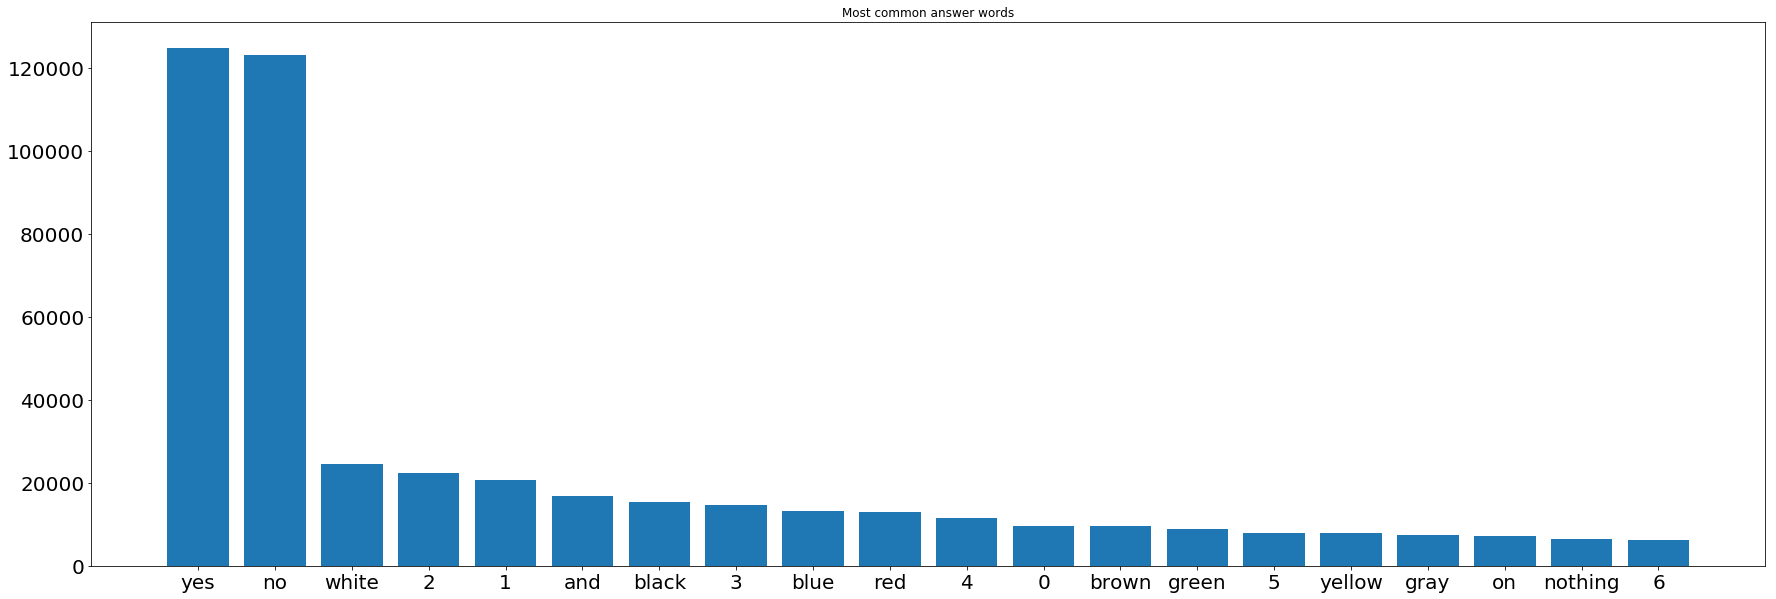

In [94]:
plt.figure(figsize=(30,10))
plt.title("Most common answer words")
plt.bar(fdistans_dict.keys(), fdistans_dict.values())
plt.tick_params(labelsize=20)
plt.savefig('vqa_{}_dataset_most_common_answers.png'.format(split))

### Entries statistics

In [6]:
!pip install torch

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import torch

ModuleNotFoundError: No module named 'torch'

In [8]:
pkl_file = cPickle.load(open("../../data/vqa-v2/cache/1_gpt_train_23_cleaned.pkl", "rb"))

In [9]:
pkl_file[0]

{'question_id': 9000,
 'image_id': 9,
 'question': 'How many cookies can be seen?',
 'answer': {'labels': [841], 'scores': [1]},
 'q_token_vilbert': [101,
  1731,
  1242,
  18621,
  1169,
  1129,
  1562,
  136,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'q_token_lm': [2437,
  867,
  14746,
  460,
  307,
  1775,
  30,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'q_input_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'q_segment_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [10]:
df_vqa = pd.DataFrame.from_records(pkl_file)

In [11]:
df_vqa.head()

answer  image_id  \
0                   {'labels': [841], 'scores': [1]}         9   
1                {'labels': [2542], 'scores': [0.9]}         9   
2                  {'labels': [2529], 'scores': [1]}         9   
3       {'labels': [1539, 1095], 'scores': [1, 0.6]}        25   
4  {'labels': [2681, 2541, 1970], 'scores': [1, 0...        25   

                                        q_input_mask  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...   

                                       q_segment_ids  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          q_token_lm  \
0  [2437, 867, 14746, 460, 307, 1775, 30, 0, 0, 0...   
1  [2061, 3124, 389, 262, 16759, 30, 0, 0, 0, 0, ...   
2  [2061, 318, 262, 4077, 3404, 30, 0, 0, 0, 0, 0...   
3  [2061, 318, 287, 2166, 286, 262, 37370, 2001, ...   
4  [2061, 466, 777, 37370, 2001, 274, 423, 287, 2...   

                                     q_token_vilbert  \
0  [101, 1731, 1242, 18621, 1169, 1129, 1562, 136...   
1  [101, 1327, 2942, 1132, 1103, 10514, 136, 102,...   
2  [101, 1327, 1110, 1103, 2448, 4333, 136, 102, ...   
3  [101, 1327, 1110, 1107, 1524, 1104, 1103, 176,...   
4  [101, 1327, 1202, 1292, 176, 5132, 15475, 1116...   

                                 question  question_id  
0           How many cookies can be seen?         9000  
1              What color are the dishes?         9001  
2                What is the green stuff?         9002  
3       What is in front of the giraffes?        25000  
4  What do these giraffes have in common?        25001

In [12]:
import json
with open("../../data/vqa-v2/cache/vocab.json") as f:
    vocab = json.load(f)

In [20]:
!pip install transformers

  Using cached https://files.pythonhosted.org/packages/2c/4e/4f1ede0fd7a36278844a277f8d53c21f88f37f3754abf76a5d6224f76d4a/transformers-3.4.0-py3-none-any.whl
     |████████████████████████████████| 2.0MB 1.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/93/83/71a2ee6158bb9f39a90c0dea1637f81d5eef866e188e1971a1b1ab01a35a/filelock-3.0.12-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/46/19/c5ab91b1b05cfe63cccd5cfc971db9214c6dd6ced54e33c30d5af1d2bc43/packaging-20.4-py2.py3-none-any.whl
     |████████████████████████████████| 286kB 952kB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 949kB/s eta 0:00:01
Processing /Users/alicemartin/Library/Caches/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45/sacremoses-0.0.43-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/c9/f58220ac44a1592f79a343caba12f6837f9e0c04c196176a3d66338e1ea8/joblib-0.17.0-py3-none-any.whl
  Using cached https://fil

In [21]:
import transformers

ModuleNotFoundError: No module named 'transformers'